In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras 
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils
import seaborn as sns

In [11]:
ds = pd.read_csv('train.csv')
ds.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [12]:
ds.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,32820.000000,32820.000000,32820.000000,32820.000000,13768.000000,3.282000e+04,15481.000000,32820.000000,11523.000000,30421.000000,...,30749.000000,30749.000000,2.941500e+04,3.062500e+04,3.127700e+04,31292.000000,31292.000000,3.127700e+04,3.282000e+04,32820.000000
mean,23450.929616,35.951676,554.854327,16661.907189,5727.615837,1.441190e+04,5635.506904,9031.179889,4666.713420,9.162191,...,4.087352,13.934795,4.969688e+04,7.759673e+04,7.583531e+04,5.767736,16.001438,4.474355e+04,9.567620e+03,6824.631840
std,13495.676061,8.529949,188.220317,25138.435416,11544.058014,2.363688e+04,14052.343253,15720.847307,10265.189742,10.790714,...,3.847766,11.455178,1.287256e+05,3.140103e+05,3.062791e+05,4.704716,13.370195,1.215379e+05,2.616736e+05,12459.140593
min,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,...,0.000000,0.000000,1.500000e-01,5.230000e+00,1.188000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,11824.750000,31.000000,425.000000,3712.000000,849.000000,2.983298e+03,796.000000,1637.875000,743.000000,3.000000,...,2.000000,6.000000,1.817300e+04,2.509642e+04,2.306400e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1285.000000
50%,23478.500000,34.000000,575.000000,8912.790000,2282.160000,7.332298e+03,2129.000000,4147.487500,1832.000000,7.000000,...,3.000000,11.000000,3.000000e+04,4.593499e+04,4.295500e+04,5.000000,13.000000,2.687600e+04,1.510650e+02,3141.000000
75%,35096.250000,39.000000,683.000000,19932.060000,6074.600000,1.684785e+04,5640.000000,10126.250000,4607.500000,12.000000,...,5.000000,19.000000,5.000000e+04,8.413612e+04,8.072400e+04,7.000000,22.000000,4.701000e+04,4.176868e+03,7349.250000
max,46886.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,301991.940000,1012.000000,...,71.000000,171.000000,1.285103e+07,3.986881e+07,3.933931e+07,117.000000,164.000000,1.293238e+07,4.468722e+07,408630.000000


In [13]:
a = ds.keys()
print(a, len(a))



Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object') 44


In [14]:
total = ds.isnull().sum().sort_values(ascending=False)
percent = (ds.isnull().sum()/ds.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
investment_4,32414,0.987629
loan_enq,32211,0.981444
vehicle_loan_active,31974,0.974223
investment_3,31488,0.959415
investment_1,31394,0.956551
vehicle_loan_closed,31195,0.950488
investment_2,30482,0.928763
personal_loan_active,30078,0.916453
personal_loan_closed,29937,0.912157
dc_cons_jun,21297,0.648903


In [15]:
dsNumeric = ds.select_dtypes(include=['float64', 'int64'])
dsNumeric.head()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,23334,63,305,7695.00,NaN,479.00,NaN,622.0,NaN,2.0,...,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435
1,20329,33,326,52702.00,988.72,29873.00,NaN,1087.0,2806.24,11.0,...,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921
2,17679,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,355.00,6.0,...,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
3,16428,44,233,20936.00,NaN,2094.00,NaN,11778.5,NaN,9.0,...,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579
4,18721,35,324,1183.83,NaN,3656.29,NaN,945.0,NaN,2.0,...,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814


In [16]:
dsCategorical = ds.select_dtypes(include=['object'])
dsCategorical.head()

,account_type,gender,loan_enq
0,saving,M,NaN
1,current,M,NaN
2,current,M,NaN
3,saving,M,NaN
4,saving,F,NaN


In [17]:
from numpy import NaN, NAN, nan

In [18]:
ds['personal_loan_active'] = ds['personal_loan_active'].fillna(0)
ds['vehicle_loan_active'] = ds['vehicle_loan_active'].fillna(0)
ds['personal_loan_closed'] = ds['personal_loan_closed'].fillna(0)
ds['vehicle_loan_closed'] = ds['vehicle_loan_closed'].fillna(0)
ds['loan_enq'] = ds['loan_enq'].fillna(0)

ds.head(30)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.000,...,2.0,45000.00,20215.85,1279.37,7.0,3.0,470.00,0,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.000,...,10.0,150000.00,122037.66,55390.00,8.0,19.0,27000.00,0,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.00,1168.000,...,7.0,13800.00,46827.00,29297.91,6.0,19.0,20800.00,0,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.500,...,1.0,19300.00,5426.55,7544.00,3.0,1.0,5300.00,0,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.000,...,3.0,3000.00,26178.05,53483.00,4.0,4.0,45000.00,0,0.00,1814
5,4340,current,M,26,233,53819.88,1371.00,4712.92,2220.00,1048.000,...,22.0,20603.00,31189.26,33183.13,7.0,31.0,20890.00,0,0.00,626
6,28060,current,F,30,683,1495.00,4237.00,2212.00,5292.00,1964.000,...,24.0,24782.00,27984.33,81517.00,3.0,31.0,50000.00,0,0.00,2052
7,746,current,M,32,892,1847.00,5976.00,1347.80,4112.00,669.000,...,19.0,30281.00,39320.36,34332.00,3.0,23.0,31663.00,0,0.00,434
8,41628,current,M,37,233,9214.92,NaN,95625.88,16423.00,11419.760,...,28.0,51555.00,285663.35,254939.15,25.0,34.0,92800.00,0,0.00,10331
9,16836,saving,M,47,233,9191.31,NaN,8327.55,NaN,14642.000,...,NaN,NaN,NaN,503.00,1.0,0.0,275.00,0,0.00,2437


In [19]:
ds['loan_enq'].unique()

array([0, 'Y'], dtype=object)

In [20]:
ds = ds.replace(to_replace=['Y'], value = 1)
ds

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.000,NaN,479.00,NaN,622.000,...,2.0,45000.00,20215.85,1279.37,7.0,3.0,470.00,0,0.00,435
1,20329,current,M,33,326,52702.000,988.72,29873.00,NaN,1087.000,...,10.0,150000.00,122037.66,55390.00,8.0,19.0,27000.00,0,4963.33,1921
2,17679,current,M,44,264,10800.490,3215.52,21659.64,1607.00,1168.000,...,7.0,13800.00,46827.00,29297.91,6.0,19.0,20800.00,0,0.00,1970
3,16428,saving,M,44,233,20936.000,NaN,2094.00,NaN,11778.500,...,1.0,19300.00,5426.55,7544.00,3.0,1.0,5300.00,0,1238.18,21579
4,18721,saving,F,35,324,1183.830,NaN,3656.29,NaN,945.000,...,3.0,3000.00,26178.05,53483.00,4.0,4.0,45000.00,0,0.00,1814
5,4340,current,M,26,233,53819.880,1371.00,4712.92,2220.00,1048.000,...,22.0,20603.00,31189.26,33183.13,7.0,31.0,20890.00,0,0.00,626
6,28060,current,F,30,683,1495.000,4237.00,2212.00,5292.00,1964.000,...,24.0,24782.00,27984.33,81517.00,3.0,31.0,50000.00,0,0.00,2052
7,746,current,M,32,892,1847.000,5976.00,1347.80,4112.00,669.000,...,19.0,30281.00,39320.36,34332.00,3.0,23.0,31663.00,0,0.00,434
8,41628,current,M,37,233,9214.920,NaN,95625.88,16423.00,11419.760,...,28.0,51555.00,285663.35,254939.15,25.0,34.0,92800.00,0,0.00,10331
9,16836,saving,M,47,233,9191.310,NaN,8327.55,NaN,14642.000,...,NaN,NaN,NaN,503.00,1.0,0.0,275.00,0,0.00,2437


In [21]:
sex_mapping = {
    'M' : 0,
    'F': 1,
}
ds.gender = ds.gender.map(sex_mapping)

account_mapping = {
    'current' : 0,
    'saving' : 1,
}

ds.account_type = ds.account_type.map(account_mapping)



In [22]:
df = ds.apply(lambda x: x.fillna(x.mean()))
df.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,1,0,63,305,7695.00,5727.615837,479.00,5635.506904,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0,0.00,435
1,20329,0,0,33,326,52702.00,988.720000,29873.00,5635.506904,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,0,4963.33,1921
2,17679,0,0,44,264,10800.49,3215.520000,21659.64,1607.000000,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0,0.00,1970
3,16428,1,0,44,233,20936.00,5727.615837,2094.00,5635.506904,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,0,1238.18,21579
4,18721,1,1,35,324,1183.83,5727.615837,3656.29,5635.506904,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0,0.00,1814


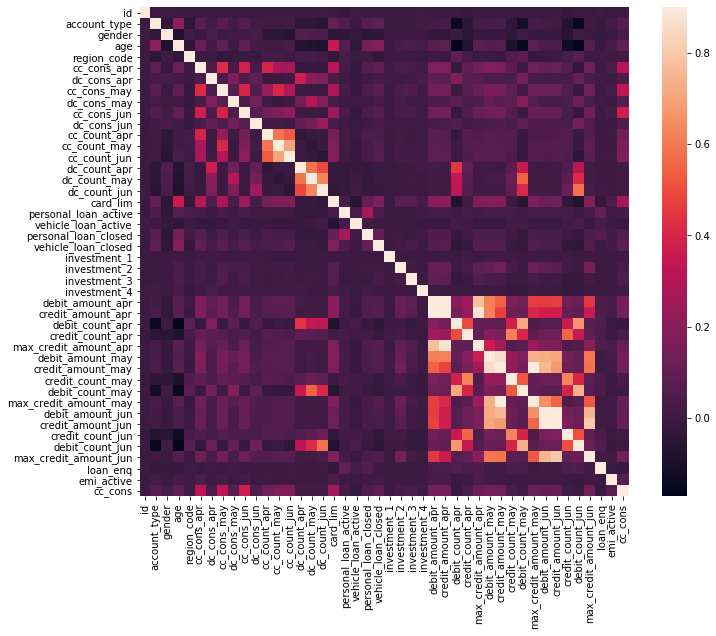

In [24]:
cor_map = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cor_map, vmax=0.9, square=True)

In [25]:
data = df.values

split = int(0.80*data.shape[0])

X_train = data[:split,1:-1]
X_test = data[split:, 1:-1]

y_train = data[:split, -1]
y_test = data[split:, -1]

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(26256, 42)
(6564, 42)
(26256,)
(6564,)


In [26]:
y_test = y_test.reshape(6564,-1)
y_train = y_train.reshape(26256,-1)

print(y_train.shape)
print(y_test.shape)

(26256, 1)
(6564, 1)


In [27]:
ts = pd.read_csv('test_9K3DBWQ.csv')
ts.head()


,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,saving,M,36,447,17942.70,1170.0,1656.00,NaN,4551.00,...,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,NaN,0.00
1,43223,current,M,31,233,44870.36,NaN,34177.00,NaN,25889.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,current,M,26,823,1073.00,2442.0,4141.00,390.0,6740.29,...,4.0,22.0,26926.0,33981.00,37762.0,3.0,15.0,29352.0,NaN,2885.82
3,12368,current,M,39,878,33060.58,NaN,3797.12,NaN,291.00,...,4.0,8.0,57185.0,52927.00,89425.0,7.0,11.0,32696.0,NaN,0.00
4,40415,current,M,44,404,18236.90,NaN,30513.30,NaN,20395.28,...,1.0,5.0,45000.0,31656.69,34275.0,3.0,4.0,19000.0,NaN,3342.58


In [28]:
ts['personal_loan_active'] = ts['personal_loan_active'].fillna(0)
ts['vehicle_loan_active'] = ts['vehicle_loan_active'].fillna(0)
ts['personal_loan_closed'] = ts['personal_loan_closed'].fillna(0)
ts['vehicle_loan_closed'] = ts['vehicle_loan_closed'].fillna(0)
ts['loan_enq'] = ts['loan_enq'].fillna(0)



In [29]:

ts = ts.replace(to_replace=['Y'], value = 1)


In [30]:
sex_mapping = {
    'M' : 0,
    'F': 1,
}
ts.gender = ts.gender.map(sex_mapping)

account_mapping = {
    'current' : 0,
    'saving' : 1,
}

ts.account_type = ts.account_type.map(account_mapping)



In [31]:
tf = ts.apply(lambda x: x.fillna(x.mean()))
tf.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,1,0,36,447,17942.70,1170.000000,1656.00,5691.616269,4551.00,...,3.000000,7.000000,10000.000000,17316.44000,5154.000000,2.000000,8.000000,5000.000000,0,0.00
1,43223,0,0,31,233,44870.36,5553.625266,34177.00,5691.616269,25889.21,...,4.133789,13.969704,48388.190527,72342.31325,71200.599636,5.836863,15.963689,42305.241682,0,0.00
2,45502,0,0,26,823,1073.00,2442.000000,4141.00,390.000000,6740.29,...,4.000000,22.000000,26926.000000,33981.00000,37762.000000,3.000000,15.000000,29352.000000,0,2885.82
3,12368,0,0,39,878,33060.58,5553.625266,3797.12,5691.616269,291.00,...,4.000000,8.000000,57185.000000,52927.00000,89425.000000,7.000000,11.000000,32696.000000,0,0.00
4,40415,0,0,44,404,18236.90,5553.625266,30513.30,5691.616269,20395.28,...,1.000000,5.000000,45000.000000,31656.69000,34275.000000,3.000000,4.000000,19000.000000,0,3342.58


In [32]:
dataset = tf.values
X2_test = dataset[:,1:]




In [33]:
print(X2_test.shape)

(14067, 42)


In [50]:
model = Sequential()
model.add(Dense(50, input_shape=(42,) ))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(30))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('relu'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                2150      
_________________________________________________________________
activation_11 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_12 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1530      
_________________________________________________________________
activation_13 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                620       
__________

In [45]:
# from keras import backend as K

# def root_mean_squared_error(y_true, y_pred):
#         return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
#               metrics =["accuracy"])

In [51]:
model.compile(optimizer='adam',
              loss='mean_squared_logarithmic_error',
             metrics=['mse'])



In [52]:
model.fit(X_train,y_train, batch_size=64, epochs=50, verbose=2, validation_data=(X_test, y_test))


Train on 26256 samples, validate on 6564 samples
Epoch 1/50
 - 2s - loss: 3.0243 - mean_squared_error: 296085992.0049 - val_loss: 3.7864 - val_mean_squared_error: 393344014.1304
Epoch 2/50
 - 1s - loss: 2.2264 - mean_squared_error: 196636965.6624 - val_loss: 1.6129 - val_mean_squared_error: 228302628.9909
Epoch 3/50
 - 1s - loss: 1.5955 - mean_squared_error: 155217049.6137 - val_loss: 1.5585 - val_mean_squared_error: 150475234.0695
Epoch 4/50
 - 1s - loss: 1.6016 - mean_squared_error: 154297962.1133 - val_loss: 1.5547 - val_mean_squared_error: 156874146.1304
Epoch 5/50
 - 1s - loss: 1.5307 - mean_squared_error: 150874072.9092 - val_loss: 1.4774 - val_mean_squared_error: 142911903.2566
Epoch 6/50
 - 1s - loss: 1.4829 - mean_squared_error: 146863425.7136 - val_loss: 1.5049 - val_mean_squared_error: 129345086.5948
Epoch 7/50
 - 1s - loss: 1.4955 - mean_squared_error: 144439575.6685 - val_loss: 1.5954 - val_mean_squared_error: 172799993.8672
Epoch 8/50
 - 1s - loss: 1.5624 - mean_squared_e

In [53]:
y_pred = model.predict(X2_test)
y_pred.shape

(14067, 1)

In [56]:
y_pred_ds = pd.DataFrame(y_pred)
cc_cons = y_pred_ds.rename(columns = {0:'cc_cons'})
cc_cons

,cc_cons
0,1992.267212
1,6335.919922
2,2018.185547
3,2776.214844
4,6088.098633
5,3249.975586
6,2221.142822
7,2084.387695
8,1446.660034
9,759.914795


In [59]:
id_ds = ts['id']
id_df = pd.DataFrame(id_ds)
id_df

,id
0,6975
1,43223
2,45502
3,12368
4,40415
5,31659
6,19585
7,11889
8,43494
9,2536


In [60]:
solution = pd.concat([id_df, cc_cons], axis=1)
solution.head(20)

,id,cc_cons
0,6975,1992.267212
1,43223,6335.919922
2,45502,2018.185547
3,12368,2776.214844
4,40415,6088.098633
5,31659,3249.975586
6,19585,2221.142822
7,11889,2084.387695
8,43494,1446.660034
9,2536,759.914795


In [61]:
# np.savetxt("Solution_final.csv", Solution_final, delimiter=",", fmt='%s')
solution.to_csv("solution1.csv", index=False)